Lo pricipal es ingestar la base desde la cual vamos a trabajar, descargada desde Kaggle, tiene los valores de los datos de empresas inmobiliarias en Bogotá

In [16]:
import pandas as pd
df= pd.read_csv("C:/Users/Marcelo/Desktop/Nueva carpeta/bases-datos/inmuebles_bogota.csv", sep=",")

**y preparamos maplot y seaborn para los graficos**

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt


**Se leen las primeras 5 filas** por convencion es lo primero que se hace en una ingesta

In [17]:
df.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


y luego se leen las ultimas 5 filas del df

In [18]:
df.tail()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000
9519,Apartamento,Apartamento en venta en Tintala,3,1,52,Tintala,Tintala,$ 144.990.000


**Imprimir las medidas del df**


In [19]:
print(df.shape)

(9520, 8)


Tiene 9520 filas y 8 columnas

**Se revisa si hay valores nulos**
Se cuenta la cantidad de datos por columnas, si en alguna hay un numero menor a 9520 significa que esta nulo

In [20]:
df.count()

Tipo            9520
Descripcion     9520
Habitaciones    9520
Baños           9520
Área            9520
Barrio          9520
UPZ             9478
Valor           9520
dtype: int64

Solo hay valores nulos en UPZ

**Se busca que tipo de datos tiene en cada columna**

In [27]:
type(df)

pandas.core.frame.DataFrame

In [38]:
print(df.columns)

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio',
       'Valor'],
      dtype='object')


La columna UPZ le faltaban datos y no es esencial para este análisis por lo que para limpiar y trabajar tranquilo la quitare.


In [36]:
df.drop(columns =  ['UPZ'], inplace = True ) #el inplace para sobreescribir, generalmente se hace luego de verificar que no quede en error 

Se verifica que este correctamente eliminado

In [37]:
print(df.columns) 

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio',
       'Valor'],
      dtype='object')


In [39]:
print(df.shape)

(9520, 7)


**CORRECTO**

**VERIFICACION DE VALORES EN COLUMNAS**

In [42]:
print(df.isna().sum()) #cuenta cantidad de faltantes en columnas, como la unica que tenia faltantes fue eliminada no hay ninguno

Tipo            0
Descripcion     0
Habitaciones    0
Baños           0
Área            0
Barrio          0
Valor           0
dtype: int64


In [44]:
df.describe()

,Habitaciones,Baños,Área
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


**FILTRO POR TIPO DE PROPIEDADES Y CANTIDADES DISPONIBLES DE CADA UNA**

In [71]:

# contar los valores únicos en la columna 'Tipo'
conteo_tipos = df['Tipo'].value_counts()

# Imprime el conteo de cada tipo
print(conteo_tipos)


Tipo
Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: count, dtype: int64


**LO MISMO PERO CON PORCENTAJES, PARA HACER EL GRAFICO**

In [70]:
# Obtener los recuentos de cada tipo en la columna 'Tipo'
conteo_tipos = df['Tipo'].value_counts()

# Calcular la longitud total de la columna 'Tipo'
total_registros = len(df)

# Calcular los porcentajes dividiendo los recuentos por el total y multiplicando por 100
porcentajes = (conteo_tipos / total_registros) * 100

# Imprimir los porcentajes de cada tipo
print(porcentajes)


Tipo
Apartamento            76.964286
Casa                   21.460084
Oficina/Consultorio     0.630252
Local                   0.399160
Edificio                0.231092
Bodega                  0.136555
Finca                   0.115546
Lote                    0.063025
Name: count, dtype: float64


In [75]:
# Agrupar por tipo de propiedad y contar la cantidad de habitaciones para cada tipo
propiedades_por_tipo_y_habitaciones = df.groupby(['Tipo', 'Habitaciones']).size().reset_index(name='Cantidad')

# Visualizar el DataFrame resultante
print(propiedades_por_tipo_y_habitaciones)


                   Tipo  Habitaciones  Cantidad
0           Apartamento             1       790
1           Apartamento             2      1911
2           Apartamento             3      4256
3           Apartamento             4       310
4           Apartamento             5        46
..                  ...           ...       ...
70  Oficina/Consultorio             5         2
71  Oficina/Consultorio             7         1
72  Oficina/Consultorio             8         2
73  Oficina/Consultorio            12         1
74  Oficina/Consultorio            15         1

[75 rows x 3 columns]


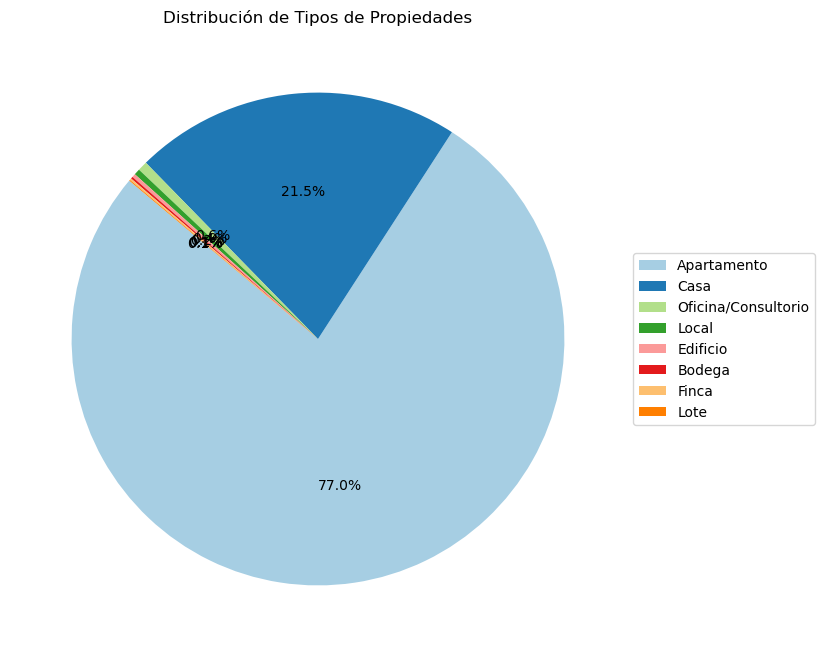

In [109]:

# Contar las ocurrencias de cada tipo de propiedad
tipo_counts = df['Tipo'].value_counts()

#gráfico de pastel solo con los colores
plt.figure(figsize=(8, 8))
plt.pie(tipo_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)  # Colores de la paleta 'Paired'
plt.title('Distribución de Tipos de Propiedades')

#leyenda fuera del gráfico de pastel
plt.legend(tipo_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [77]:
# contar los valores únicos en la columna 'Tipo'
conteo_tipos = df['Barrio'].value_counts()

# Imprime el conteo de cada tipo
print(conteo_tipos)


Barrio
Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: count, Length: 149, dtype: int64


In [87]:
import pandas as pd

# Copia del DataFrame original para evitar problemas de asignación
df_copy = df.copy()

# Función para limpiar los valores de la columna 'Valor'
def clean_valor(valor):
    # Reemplazar puntos y comas, eliminar el símbolo de dólar y convertir a número
    valor_limpio = valor.replace('.', '').replace(',', '').replace('$', '')
    # Manejar casos donde el valor tiene dos puntos decimales
    if valor_limpio.count('.') > 1:
        valor_limpio = valor_limpio.replace('.', '', valor_limpio.count('.') - 1)
    # Convertir a número y devolver
    try:
        return float(valor_limpio)
    except ValueError:
        # Si no se puede convertir, devolver NaN
        return float('nan')

# Aplicar la función a la columna 'Valor' y crear una nueva columna 'Valor_Limpio'
df_copy['Valor_Limpio'] = df_copy['Valor'].apply(clean_valor)

# Calcular el promedio del valor según el barrio
promedio_valor_por_barrio = df_copy.groupby('Barrio')['Valor_Limpio'].mean()

# Configurar el formato de visualización para mostrar los números como decimales
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar el promedio del valor por barrio
print(promedio_valor_por_barrio)


Barrio
Alameda              580,000,000.00
Alhambra             752,352,941.18
Andes Norte          709,571,428.57
Antonio Nariño       459,221,875.00
Barrancas            314,133,333.33
                          ...      
Villa Maria          402,846,153.85
Villas De Granada    282,301,136.36
Villemar             303,833,333.33
Zona Franca          160,000,000.00
Zona Noroccidental   620,813,068.88
Name: Valor_Limpio, Length: 149, dtype: float64


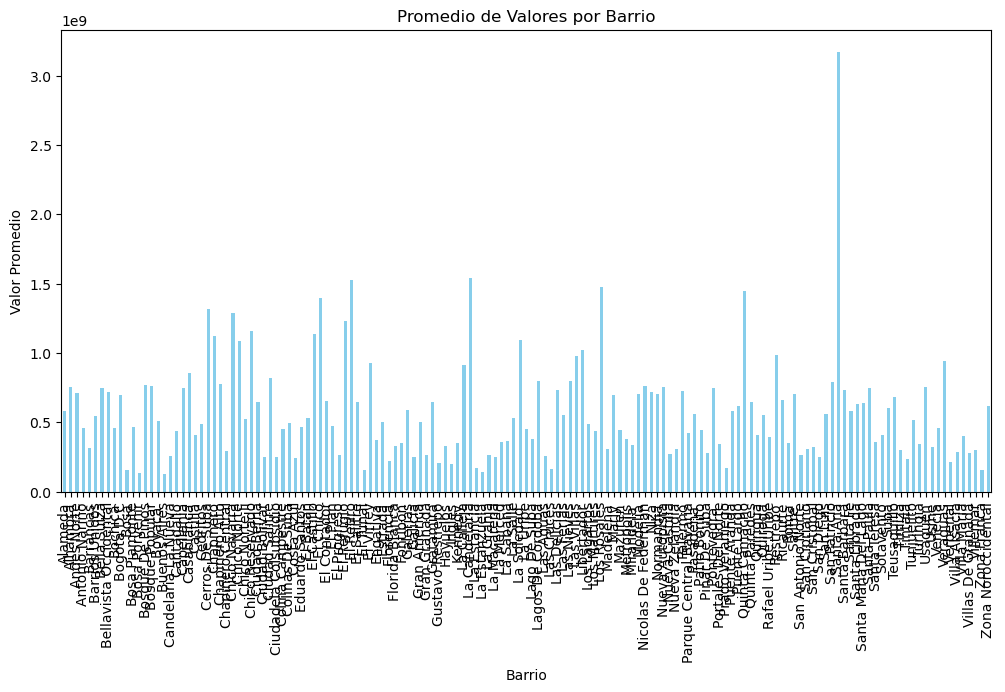

In [151]:
# Calcular el promedio del valor por barrio
promedio_valor_por_barrio = df_copy.groupby('Barrio')['Valor_Limpio'].mean()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
promedio_valor_por_barrio.plot(kind='bar', color='skyblue')
plt.title('Promedio de Valores por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Valor Promedio')
plt.xticks(rotation=90)
plt.show()

In [104]:
# Formatear el valor en el DataFrame
propiedades_una_habitacion_sorted['Valor_Formateado'] = propiedades_una_habitacion_sorted['Valor_Limpio'].apply(lambda x: '{:,.2f}'.format(x))

# Obtener la lista de barrios ordenada de mayor a menor valor
barrios_ordenados = propiedades_una_habitacion_sorted['Barrio'].unique()

# Imprimir la lista de barrios ordenada con el formato especificado
for barrio in barrios_ordenados:
    valor_formateado = propiedades_una_habitacion_sorted[propiedades_una_habitacion_sorted['Barrio'] == barrio]['Valor_Formateado'].iloc[0]
    print(f"{barrio: <20} {valor_formateado}")


Chico Norte          6,720,791,000.00
Chapinero            3,900,000,000.00
Usaquén              3,143,226,000.00
Puente Aranda        2,800,000,000.00
Los Rosales          2,755,500,000.00
Santa Barbara        1,937,500,000.00
Zona Noroccidental   1,700,000,000.00
Chico Reservado      1,200,000,000.00
Santa Fe             1,193,390,000.00
El Chicó             1,100,000,000.00
Usme                 1,080,000,000.00
Fontibón             1,000,000,000.00
Kennedy              950,000,000.00
Barrios Unidos       749,000,000.00
El Refugio           720,000,000.00
Chapinero Alto       680,000,000.00
El Virrey            635,000,000.00
La Salle             580,000,000.00
San Patricio         565,000,000.00
Las Nieves           545,000,000.00
Marly                530,000,000.00
Bella Suiza          510,000,000.00
Cedritos             490,000,000.00
Chico Norte Ii       480,000,000.00
La Calleja           474,500,000.00
Ciudad Salitre       474,000,000.00
Normandia            465,000,000.00
Parq

In [154]:
#cual es la relacion entre barrio y valor_limpio
import statsmodels.formula.api as smf

modelo1 = smf.ols("Valor_Limpio ~ Habitaciones", data = df_copy)


In [165]:
import pandas as pd
import statsmodels.api as sm


# Asegúrate de que las variables Habitaciones, Baños y Valor_Limpio sean numéricas
df_copy['Habitaciones'] = pd.to_numeric(df['Habitaciones'])
df_copy['Baños'] = pd.to_numeric(df_copy['Baños'])

df_copy = df_copy.dropna(subset=['Habitaciones', 'Baños'])

# Crear una matriz de características (X) que incluya Habitaciones y Baños
X = df_copy[['Habitaciones', 'Baños']]

# Agregar un intercepto a la matriz de características
X = sm.add_constant(X)

# Variable de respuesta
y = df_copy['Valor_Limpio']

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Obtener un resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:           Valor_Limpio   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                 -0.253
Method:                 Least Squares   F-statistic:                    0.5962
Date:                Sun, 15 Oct 2023   Prob (F-statistic):              0.627
Time:                        02:07:26   Log-Likelihood:                -102.89
No. Observations:                   5   AIC:                             211.8
Df Residuals:                       2   BIC:                             210.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           1.6e+08   8.39e+08      0.191   

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_7464\1777831759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Habitaciones'] = pd.to_numeric(df['Habitaciones'])
C:\Users\Marcelo\AppData\Local\Temp\ipykernel_7464\1777831759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Baños'] = pd.to_numeric(df_copy['Baños'])
C:\Users\Marcelo\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.

In [166]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Valor_Limpio   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     604.1
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          2.22e-129
Time:                        02:07:33   Log-Likelihood:            -2.0717e+05
No. Observations:                9520   AIC:                         4.143e+05
Df Residuals:                    9518   BIC:                         4.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.441e+08   1.26e+07     27.266      0.000    3.19e+08    3.69e+08
Habitaciones  8.397e+07   3.42e+06     24.578      0.000    7.73e+07    9.07e+07
==============================================================================
Omnibus:                    10598.816   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1851199.913
Skew:                           5.471   Prob(JB):                         0.00
Kurtosis:                      70.433   Cond. No.                         7.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""